# SBM

In [1]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
#Create Temporal network
n = [50,50]
p = [[0.001,0],[0,0.00005]]
t = 30000
name = "data/SBM/SBM_ud_n"+str(n[0])+"-"+str(n[1])+"_p"+str(p[0][0])[2:]+"-"+str(p[1][1])[2:]+"_T"+str(t)+".edges"
A = [nx.stochastic_block_model(n,p,seed = None) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[-1].add_edge(u,v)
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [2]:
filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T30000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = False)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327, 15000]


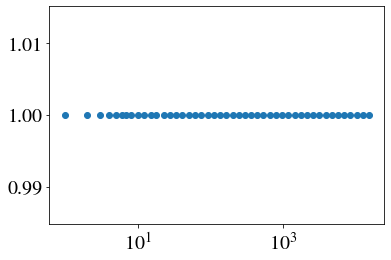

In [70]:
num = 50
T = sorted([6]+list(set(list(np.logspace(np.log10(15000),np.log10(1), num, dtype = int)))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [73]:
I = [16]
print(I)
print(T)

[16]
[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327, 15000]


In [45]:
STN["PAT512"]

{533: [2633,
  2689,
  2747,
  2628,
  2640,
  2663,
  2665,
  2647,
  2723,
  2655,
  2653,
  2651,
  2613,
  2642,
  2684,
  2719,
  2684,
  2666,
  2644,
  2681,
  2645,
  2656,
  2651,
  2671,
  2656,
  2693,
  2689,
  2653,
  2682,
  2684,
  2619,
  2688,
  2642,
  2676,
  2628,
  2655,
  2638,
  2636,
  2708,
  2680,
  2631,
  2684,
  2724,
  2645,
  2659,
  2649,
  2637,
  2628,
  2630,
  2639]}

In [74]:
STN.run2(I, T,  maxsamp = 50, minsamp = 30)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327]
Analyzing sample number 5 for samplelength  15000


In [13]:
STN.run(*T,  maxsamp = 50, minsamp = 10)

Done with samplelengths  [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 23, 28, 34, 41, 50, 61, 74, 91, 111, 135, 164, 200, 243, 296, 360, 438, 533, 649, 790, 961, 1169, 1423, 1732, 2107, 2564, 3120, 3797, 4620, 5622, 6842, 8325, 10130, 12327]
Analyzing sample number 5 for samplelength  15000 and  8 slices


In [75]:
STN.save()

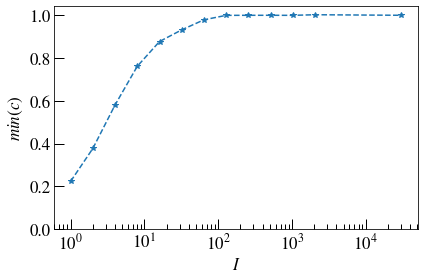

In [61]:
STN.plot_min([2** i for i in range(1,12)], T=True, log = True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6666: RuntimeWarning: underflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


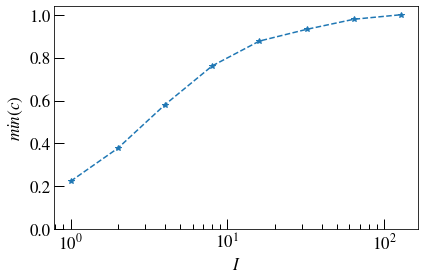

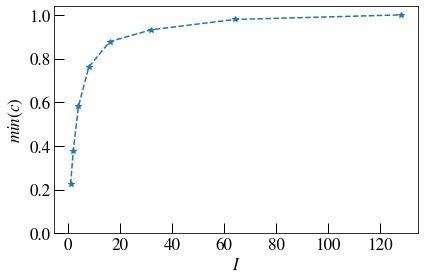

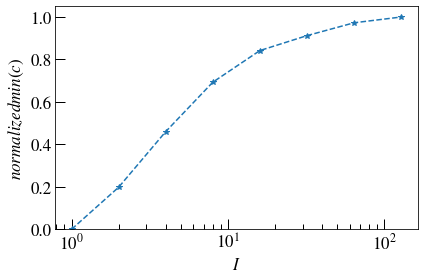

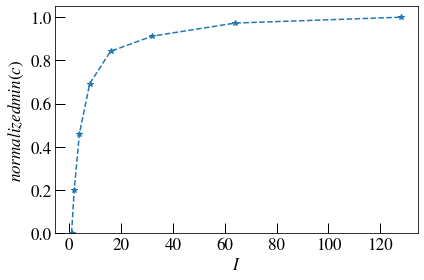

In [20]:
STN.plot_min([2** i for i in range(1,8)], T=False, log = True)
STN.plot_min([2** i for i in range(1,8)], T=False, log = False)
STN.plot_min([2** i for i in range(1,8)], T=False, log = True, normalize = True)
STN.plot_min([2** i for i in range(1,8)], T=False, log = False, normalize = True)

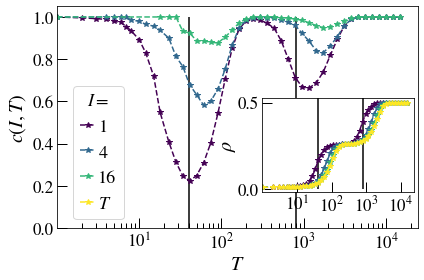

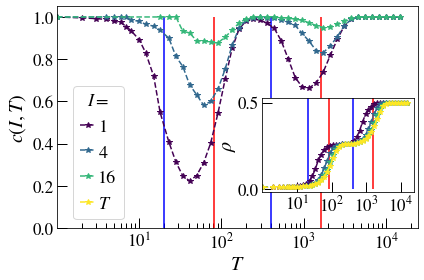

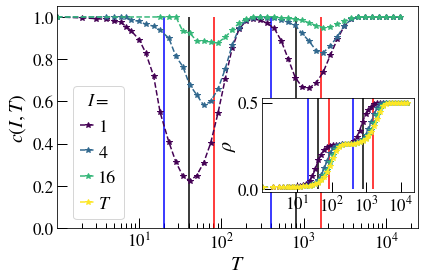

In [88]:
vline=[(STN.TC(50,0.001), "black", None),(STN.TC1(50,0.001), "red", None),(STN.TC2(50,0.001), "blue", None),
       (STN.TC(50,0.00005), "black", None),(STN.TC2(50,0.00005), "red", None),(STN.TC1(50,0.00005), "blue", None)]
inset = [0.57, 0.165, 0.42, 0.42]
legend = "lower left"
bbox = (0.02, 0, 0.5, 0.5)

#STN.plot_LCC(ACC = True, save="SBM_G")
#STN.plot_LCC(normalize = False, log=True, ACC = True, save="SBM_G_log")

vline=[(STN.TC(50,0.001), "black", None),(STN.TC(50,0.00005), "black", None)]
STN.plot_c(vline = vline,legend = legend,bbox= bbox, inset = inset, I=[4,16], save = "SBM_c_rho_ana1")

vline=[(STN.TC2(50,0.001), "red", None),(STN.TC1(50,0.001), "blue", None),
       (STN.TC2(50,0.00005), "red", None),(STN.TC1(50,0.00005), "blue", None)]
STN.plot_c(vline = vline,legend = legend,bbox= bbox, inset = inset, I=[4,16], save = "SBM_c_rho_ana2")

vline=[(STN.TC(50,0.001), "black", None),(STN.TC2(50,0.001), "red", None),(STN.TC1(50,0.001), "blue", None),
       (STN.TC(50,0.00005), "black", None),(STN.TC2(50,0.00005), "red", None),(STN.TC1(50,0.00005), "blue", None)]
STN.plot_c(vline = vline,legend = legend,bbox= bbox, inset = inset, I=[4,16], save = "SBM_c_rho_ana3")



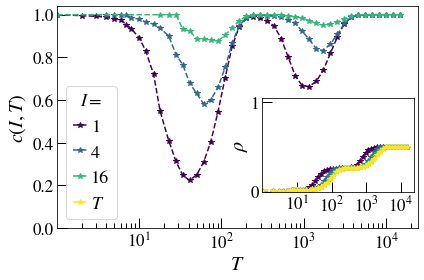

In [76]:
vline=[(STN.TC(50,0.001), "black", None),(STN.TC1(50,0.001), "red", None),(STN.TC2(50,0.001), "blue", None),
       (STN.TC(50,0.00005), "black", None),(STN.TC2(50,0.00005), "red", None),(STN.TC1(50,0.00005), "blue", None)]
inset = [0.57, 0.165, 0.42, 0.42]
legend = "lower left"
STN.plot_c(legend = legend, inset = inset, I=[4,16])


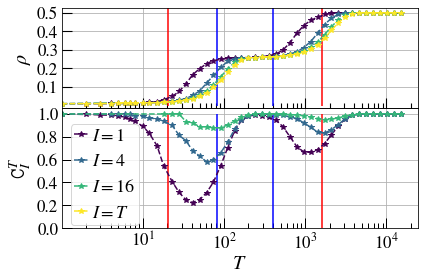

In [42]:
vline=[(STN.TC1(50,0.001), "red", None),(STN.TC2(50,0.001), "blue", None),
       (STN.TC2(50,0.00005), "red", None),(STN.TC1(50,0.00005), "blue", None)]
legend = "lower left"
#bbox = (-0.02, 1.05)
bbox = (0,-1.26)
STN.plot_cs(legend = legend,  I=[4,16], bbox = bbox, save = "SBM_cr", vline = vline)
